# Spotify Podcast Dataset

RSS Part 3:  Analysis of Categories.

Question: is there a correlation between categories and duration of podcast?

In [33]:
import pandas as pd
import numpy as np
import os
import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt
from collections import Counter
plt.rcParams['figure.figsize'] = [5, 5]


## Parse metadata from Spotify

In [34]:
df = pd.read_csv('../podcasts-no-audio-13GB-selected/metadata_with_podcast_category.tsv', sep='\t')

In [35]:
df.columns

Index(['show_uri', 'show_name', 'show_description', 'publisher', 'language',
       'rss_link', 'episode_uri', 'episode_name', 'episode_description',
       'duration', 'show_filename_prefix', 'episode_filename_prefix',
       'first_dir', 'second_dir', 'category'],
      dtype='object')

In [36]:
cats_df = pd.read_csv('../podcasts-no-audio-13GB-selected/expanded_category_metadata.tsv', sep='\t')

In [37]:
cats_df.columns

Index(['show_filename_prefix', 'category', 'mean_show_duration',
       'mean_category_duration'],
      dtype='object')

<Axes: ylabel='Frequency'>

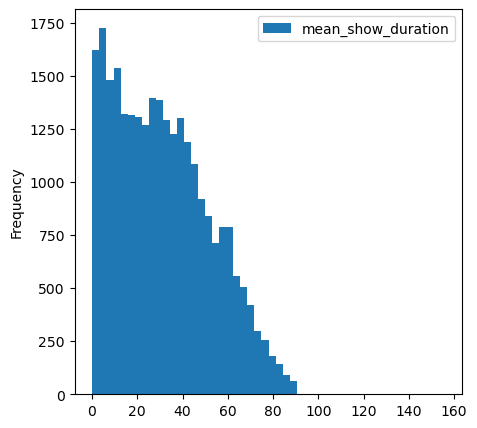

In [38]:
cats_df.plot.hist(y='mean_show_duration',bins=50)

## What is the relationship with categories and podcast duration (BoxPlot)?

Text(0.5, 0, 'All Categories')

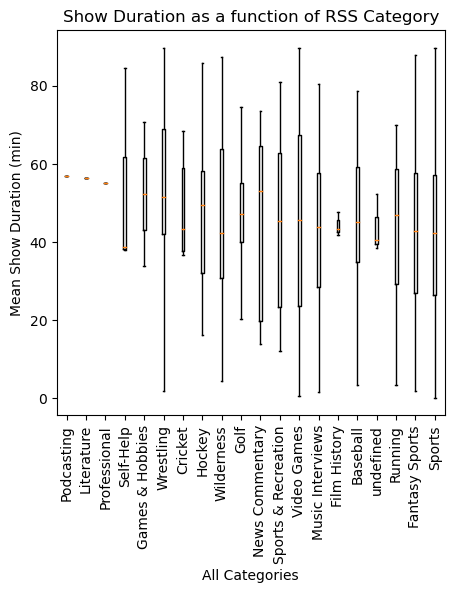

In [51]:
# Define the desired order for the x-axis
categories_my_order = cats_df.sort_values(by='mean_category_duration',ascending=False)['category'].unique()[:20]

# Create a boxplot and set the order
cats_df2 = cats_df[['category','mean_show_duration']]

#ax = cats_df3[['category','mean_show_duration']].boxplot(by='category')
#ax.set_xticklabels(order, rotation=45);

fig, ax = plt.subplots()
for position, category in enumerate(categories_my_order):
    ax.boxplot(cats_df2[cats_df2['category']==category]['mean_show_duration'], showfliers=False, positions=[position])

#ax.set_xticks(range(position+1))
ax.set_xticklabels(categories_my_order, rotation=90);
#ax.set_xticks([]);
ax.set_title('Show Duration as a function of RSS Category')
ax.set_ylabel('Mean Show Duration (min)')
ax.set_xlabel('All Categories')

## Word Cloud of Categories, Size relative to Frequency of Occurance

In [40]:
categories = [c for c in cats_df['category'].to_numpy()]
category_counts = Counter(categories)
sorted_counts = dict(sorted(category_counts.items(), key=lambda item: item[1], reverse=True))
values, frequencies = zip(*sorted_counts.items())

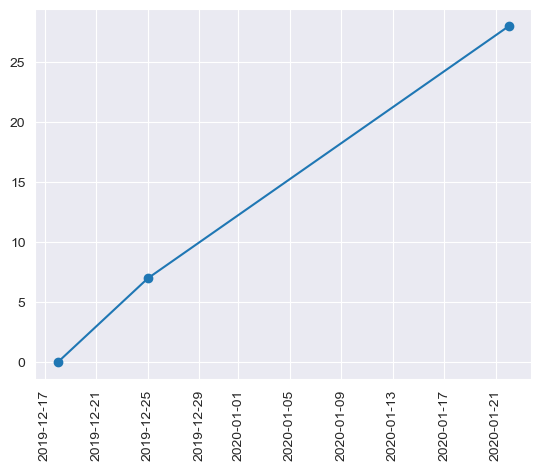

In [44]:
plt.plot(df_show.release_date, df_show.days_since_last,'o-')
plt.xticks(rotation=90);

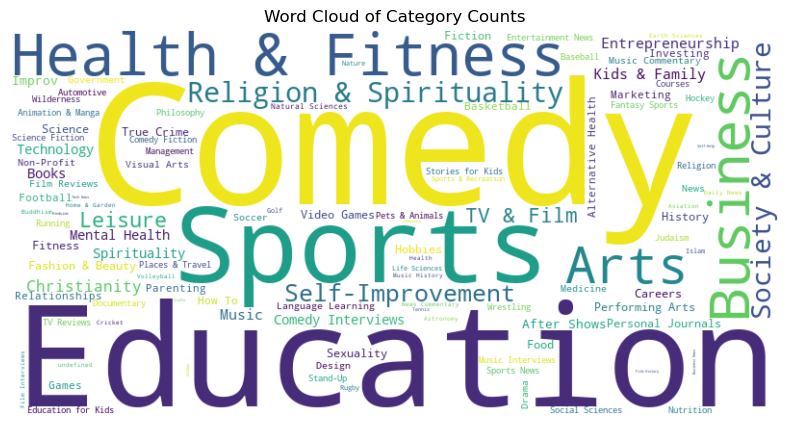

In [41]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud with the specified font
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sorted_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Category Counts')
plt.show()

## How many podcasts have 10 or fewer episodes?  

Take away: The number of shows is inflated.  Most episodes are from a select few.

Filter out podcast episodes where the show has less than 10 episodes

This is to ensure we are working with shows that have a reasonable trend toward creation.  The goal of the work is to inform other creators of podcasts.

In [42]:
value_counts = df['show_filename_prefix'].value_counts()

# Filter out rows where the value occurs more than 10 times
#df_filtered = df[df['show_filename_prefix'].apply(lambda x: value_counts[x] > 10)]

In [43]:
# Number of total episodes in a show.
tmp = df['show_filename_prefix'].value_counts().reset_index()

tmp.sort_values(by='show_filename_prefix',ascending=False)
# Use Counter to count the frequency of each number
number_counts = Counter(tmp['show_filename_prefix'])
value = [(k,v) for k,v in dict(number_counts).items()]


In [44]:
total_episodes, total_episode_frequency = zip(*value)

(0.0, 10.0)

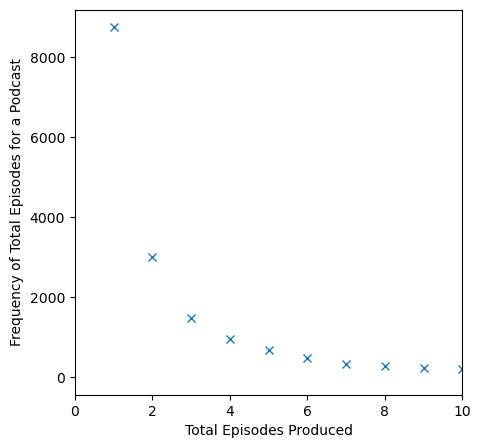

In [45]:
# There are alot of shows where they have one episode
# There are much less than have more than 10
plt.figure()
plt.plot(total_episodes, total_episode_frequency,'x')
plt.xlabel('Total Episodes Produced')
plt.ylabel('Frequency of Total Episodes for a Podcast')
plt.xlim(0, 10)  
#plt.ylim(100, 2000)  

In [201]:
tot_accum = 0
ten_podcasts_or_less = 0
tot_accum_episodes = 0
ten_podcasts_or_less_episodes = 0
threshold = 2
for tot, count in value:
    tot_accum += count
    tot_accum_episodes += count * tot
    if tot < threshold:
        ten_podcasts_or_less += count
        ten_podcasts_or_less_episodes += count * tot
print(f"{ten_podcasts_or_less/tot_accum * 100:.1f}% of shows have fewer than {threshold} episodes.  Or {ten_podcasts_or_less} out of {tot_accum} shows.")
print(f"This accounts for {ten_podcasts_or_less_episodes / tot_accum_episodes * 100:.1f}% episodes. Or {ten_podcasts_or_less_episodes} out of {tot_accum_episodes} episodes.")

47.6% of shows have fewer than 2 episodes.  Or 8741 out of 18376 shows.
This accounts for 8.3% episodes. Or 8741 out of 105360 episodes.


In [122]:
total_shows = df['show_filename_prefix'].unique().shape[0]

## Create a Poisson distribution

Attempt to count the amount of episodes created for each show as a ratio for all 

In [195]:
# Set the desired start_date and end_date
start_date = pd.to_datetime("2019-01-01")
end_date = pd.to_datetime("2019-12-31")

tmp_df = df[(df['release_date'] >= start_date) & (df['release_date'] <= end_date)]
tmp = df['show_filename_prefix'].value_counts().reset_index()
tmp

,index,show_filename_prefix
0,show_21ASCcEXgUlbFSmoqjroZm,1072
1,show_5HT3tYlyW8TJF9KWHQXXtX,746
2,show_56CjYLQWyMx1MkOEQmlubi,615
3,show_1hygb4nGhNhlLn4pBnN00j,424
4,show_4GoSoxDAsPxdQifYr4vv69,417
...,...,...
18371,show_1DDKvGD5bOIHHs0Npt6z7E,1
18372,show_15YEH0lr4YBAeV7D4nKLxw,1
18373,show_1QyEH4vgCMpLb6KEGfXfhe,1
18374,show_65WBuCFG6GrhPARkM8JFqa,1


## Estimate the PDF of the distribution for number of episodes a show creates

array([[<Axes: title={'center': 'total_episodes'}>]], dtype=object)

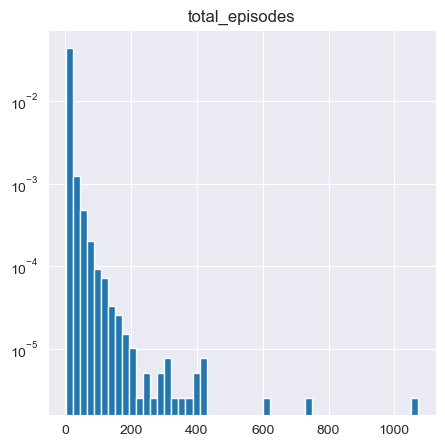

In [197]:
# Number of total episodes in a show.
tmp = df['show_filename_prefix'].value_counts().reset_index()
tmp['total_episodes'] = tmp['show_filename_prefix']
tmp.drop(columns='show_filename_prefix',inplace=True)
tmp.sort_values(by='total_episodes',ascending=False)
tmp.hist(bins=50,log=True,density=True)

In [198]:
tmp['total_episodes']

0        1072
1         746
2         615
3         424
4         417
         ... 
18371       1
18372       1
18373       1
18374       1
18375       1
Name: total_episodes, Length: 18376, dtype: int64

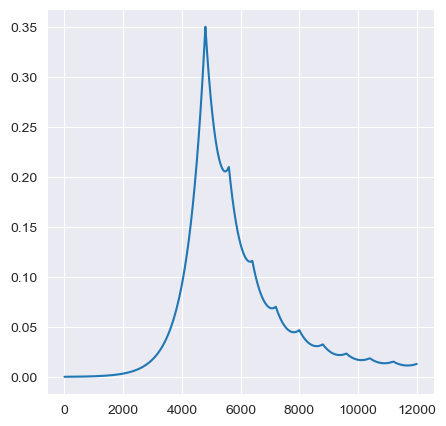

In [192]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='exponential', bandwidth=0.75).fit(tmp['total_episodes'].to_numpy().reshape(-1, 1))
X_plot = np.linspace(-5, 10, 12000)
log_dens = kde.score_samples(X_plot.reshape(-1,1))
plt.plot(np.exp(log_dens))
#np.sum(np.exp(log_dens))

In [173]:
ndx.shape

(19000,)

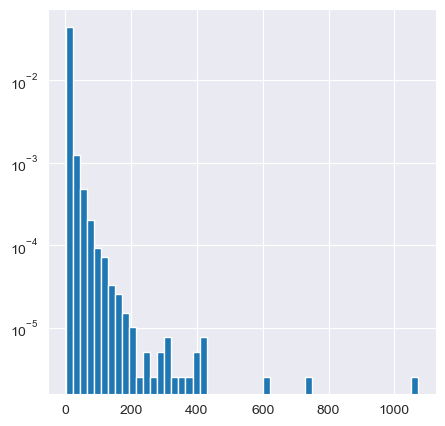

In [128]:
import seaborn as sns
sns.set_style('darkgrid')
ax = plt.hist(tmp['total_episodes'], bins=50,log=True,density=True)

In [144]:
probs = ax[0]
vals   = ax[1]
prob = []
for p,v in zip(probs,vals):
    prob.append(p*v)
sum(prob)

0.15416248490398912